# Python Lanchester's laws simulation

Notebook showing how to predict result of a battle using the Lanchester's equations.
The repository includes a python module (lanchester.py) that calculates the differential equation in time. To make a prediction, you need to define the start parameters for red and blue units, appropriate for the selected model, and then run the selected model. There are 3 different models available: square law, linear law and the extended modernized model.

> lanchester.square() - square law (N-square law)

> lanchester.linear() - linear law

> lanchester.modernized() - modernized model

You can find out more about the Lanchester equations here: https://en.wikipedia.org/wiki/Lanchester%27s_laws

***

(c) 2022 Marcin "szczyglis" Szczygliński

GitHub page: https://github.com/szczyglis-dev/python-lanchester

Email: szczyglis@protonmail.com

Version: 1.0.0

This file is licensed under the MIT License.

License text available at https://opensource.org/licenses/MIT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lanchester

1) Define start parameters. Note that each of the 3 models uses different startup parameters:

In [2]:
# base parameters:
R0 = 8000 # number of RED units
B0 = 10000 # number of BLUE units
T = 100 # total number of steps in the simulation
dt = 1 # time interval 


# parameters for "linear" and "modernized" models:
r_l = 0.00001 # combat efficiency of RED units
b_l = 0.00002 # combat efficiency of BLUE units


# parameters for "square" and "modernized"  models:
r_s = 0.2 # average number of RED units that damage each other per unit of time
b_s = 0.1 # average number of BLUE units that damage each other per unit of time


# parameters for "modernized" model only:
r_f = 0.6 # RED units camouflage ability factor
b_f = 0.2 # BLUE units camouflage ability factor

r_a = 0.6 # RED units ability to recognize
b_a = 0.2 # BLUE units ability to recognize

r_i = 4 # RED units information warfare ability coefficient
b_i = 4 # BLUE units information warfare ability coefficient

2) Select (uncomment) the selected model, you can use 3 different models: "linear", "square" or "modernized":

In [3]:
#R, B = lanchester.square(R0, B0, r_s, b_s, T, dt)
#R, B = lanchester.linear(R0, B0, r_l, b_l, T, dt)
R, B = lanchester.modernized(R0, B0, r_l, b_l, r_s, b_s, r_f, r_a, b_f, b_a, r_i, b_i, T, dt)

3) Display predicted result of the battle:

Predicted result of the battle：

Winner: RED
Remaining RED units [ 1850.57851514149 ]
Remaining BLUE units [ -306.5169244965781 ]


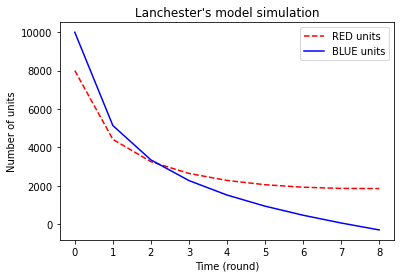

In [4]:
# display result
print("Predicted result of the battle：\n")
if R[-1] > B[-1]:
    print("Winner: RED")
else:
    print("Winner: BLUE")

# display remaining units info  
print("Remaining RED units [", R[-1], "]")
print("Remaining BLUE units [", B[-1], "]")

# display result on plot
t = np.arange(0, len(R) * dt, dt)
plt.figure(1)
plt.plot(t, R, '--r', label='RED units')
plt.plot(t, B, 'b', label='BLUE units')
plt.xlabel("Time (round)")
plt.ylabel("Number of units")
plt.title("Lanchester's model simulation")
plt.legend()
plt.show()